#Gapminder Insights

## Introduction

The purpose of this notebook is to first analyze the relationship between GDP per capita and life expectancy, and then suggest some meaningful questions to answer to.

## 1.

### Dataframe importing and cleaning

Firstly, we need to import the libraries we will use further down the code. 

In [ ]:
# Importation of the different libraries we will need
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Then, we can import the database from the .csv file previosly downloaded from **Our World In Data**.

In [ ]:
# Creation of the database 
# Source: https://ourworldindata.org/grapher/life-expectancy-vs-gdp-per-capita
df = pd.read_csv("datasets/life-expectancy-vs-gdp-per-capita.csv")

We can now remove two columns which we are not going to utilize and rename the total population column for ease of use later.

In [ ]:
# Cleaning names of useless columns (such as code of the country and annotations)
to_drop = ['Code','145446-annotations']
df.drop(to_drop, inplace=True, axis=1)

# Renaming of the colums to an easier name to be called later
df = df.rename(columns={"Total population (Gapminder, HYDE & UN)":"Population"})

### Data processing

A scatter plot of *GDP* vs *life expectancy* is expected. We intend to plot it for a specific year, with countries ordered by continent.

When looking at the data, we noticed some values are missing, especially the continent value for some years.

As can be seen below, continent is provided only for the year **2015**: we chose to plot this specific year as it is recent and allows us to save time. This value could be added to the other years where continent is NaN by looping on the countries name and replacing the continent value.

In [ ]:
# Finding where each country has the continent name
df[df['Continent'].isna() == False]['Year'].unique()
# As can be seen, the only unique year present for all the non-zero continents is 2015

array([2015])

In [ ]:
#Then, we check if all the continents have data on the one we are interested (i.e. GDP and life expectancy)
continents=df['Continent'].unique()
list_continents_check=[]
for i in range(0,len(continents)):
    number_countries = df[df['Continent']==continents[i]].count()
    list_continents_check.append([continents[i],number_countries])

list_continents_check

[['Asia',
  Entity             62
  Year               62
  Life expectancy    50
  GDP per capita     45
  Population         50
  Continent          62
  dtype: int64],
 [nan,
  Entity             0
  Year               0
  Life expectancy    0
  GDP per capita     0
  Population         0
  Continent          0
  dtype: int64],
 ['Europe',
  Entity             75
  Year               75
  Life expectancy    49
  GDP per capita     41
  Population         50
  Continent          75
  dtype: int64],
 ['Africa',
  Entity             61
  Year               61
  Life expectancy    58
  GDP per capita     51
  Population         58
  Continent          61
  dtype: int64],
 ['Oceania',
  Entity             26
  Year               26
  Life expectancy    23
  GDP per capita      2
  Population         23
  Continent          26
  dtype: int64],
 ['North America',
  Entity             42
  Year               42
  Life expectancy    40
  GDP per capita     18
  Population         41
  Contin

In [ ]:
# From the results, we can notice that Antarctica doesn't have data for us: we can remove it
# Cleaning the dataframe from Antarctica data
df=df[df['Continent'] != "Antarctica"]

### a.

It is required to draw a scatter plot of GDP per capita vs life expectancy. We used the seaborn library as it is more familiar to us. The best way to plot it was to use colors to differentiate between different continents and different sizes for different populations. In this way, we can analyse effectively the data in a single plot. As stated before, only the year 2015 is plotted.

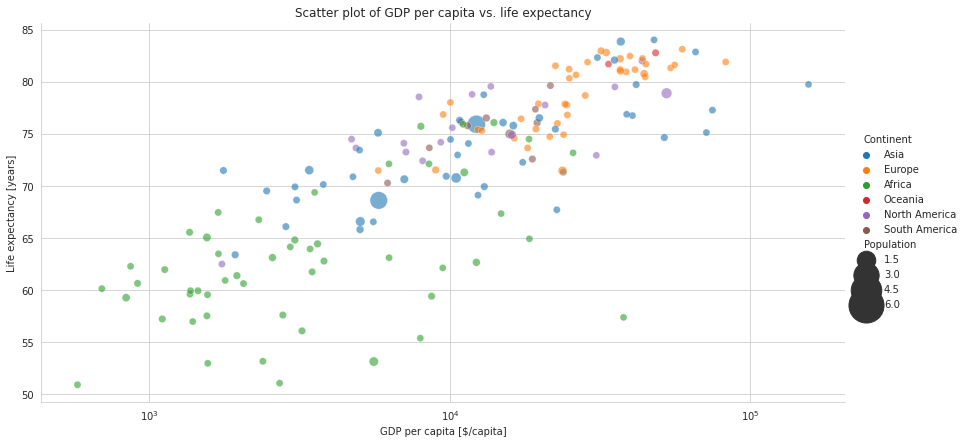

In [ ]:
# Scatter plot of GDP per capita ($) vs Life expectancy (years). 
# Scale is logarithmic as a linear scale would result in overplotting in the low GDP per capita region
# Different colors indicate differenct continents
# Size of the dots indicates the population (in billions)

sns.set_style('whitegrid')
df2015 = df[df['Year'] == 2015]

g = sns.relplot(
    data=df2015, 
    x='GDP per capita', 
    y='Life expectancy', 
    hue='Continent', 
    size='Population', 
    alpha=0.6, 
    edgecolors="grey", 
    linewidth=0.5, 
    sizes=(50, 1500), 
    height=6, 
    aspect=2).set(
        xscale="log", 
        title="Scatter plot of GDP per capita vs. life expectancy")

g.set_xlabels("GDP per capita [$/capita]")
g.set_ylabels("Life expectancy [years]")


### b.

The data obtained is reasonable as it is intuitive to understand how wealth is directly correlated to life expectancy. Lower income countries, which are composed mainly of Africa and Asia, are in the bottom-left part of the chart, while european countries mainly lie in the upper-right part. It must be noted that asian countries lies in all the chart as we have many differences between the many countries composing Asia (eg. Japan and Afghanistan).

What can also be done is to fit all the countries data to find a correlation between GDP per capita and life expectancy, giving us a metric to understand how wealth directly increases life expectancy. As clearly seen by the chart above, the correlation can be expressed by a linear regression, but with the x-axis logarithmic. 

In [ ]:
# Removing all the NaN values of the dataframe to allow the np.polyfit function to work properly
df2015drop = df2015.dropna()

# Linear regression of the logarithm of GPD per capita vs life expectancy  
x = np.log(df2015drop['GDP per capita'])
y = df2015drop['Life expectancy']
fit = np.polyfit(x, y, 1)

# Printing fit results
print('Slope: ', fit[0])
print('Intercept: ', fit[1])

Slope:  5.477366105443977
Intercept:  21.404364647853143


This means we can write down the equation Y = 21.40 + 5.48*log(X), where Y is life expectancy and X is GDP per capita. This equation can allow us to understand how just moving from 1000 $/cap to 5000 $/cap increases the life expectancy by almost 10 years, a big leap.

### c.

As seen above, the data cleaning is done in the introduction. More precisely, the following cleaning steps are used: removing columns, removing continent, removing NaN rows, renaming columns.

### d.

In [ ]:
# Statistics on the dataframe for the year 2015

mean_value_life = df2015['Life expectancy'].mean()
std_life = df2015['Life expectancy'].std()

print('The mean value of life expectancy is: ', mean_value_life)
print('The standard deviation of life expectancy is: ', std_life)


df_highlife=df2015[df2015['Life expectancy']>=mean_value_life+std_life]['Entity']
print('The number of countries fulfilling this criterion is: ', df_highlife.count())
print('The countries with high life expectancy are:')
df_highlife

The mean value of life expectancy is:  72.93088421617283
The standard deviation of life expectancy is:  7.7499600306139245
The number of countries fulfilling this criterion is:  42
The countries with high life expectancy are:


1293                        Andorra
1811                       Anguilla
3107                      Australia
3344                        Austria
5245                        Belgium
5921                        Bermuda
9026                         Canada
9480                 Cayman Islands
10070               Channel Islands
17036              Falkland Islands
17470                       Finland
18010                        France
19614                       Germany
20211                        Greece
20819                    Guadeloupe
22572                     Hong Kong
23202                       Iceland
24396                       Ireland
24649                   Isle of Man
24721                        Israel
25059                         Italy
25988                         Japan
29397                 Liechtenstein
29964                    Luxembourg
30174                         Macao
31504                         Malta
31982                    Martinique
33641                       

### e.

We&nbsp;don't&nbsp;have&nbsp;the&nbsp;data&nbsp;GDP&nbsp;but&nbsp;GDP&nbsp;per&nbsp;capita:&nbsp;we need to create&nbsp;it by using both the GDP per capita and the total population. 

In [ ]:
# Product by columns and then add a new column to the dataframe of 2015
df_GDP2015=df2015[["GDP per capita", "Population"]].product(axis=1)

# Carefully we add a new column to our dataframe, skipping entities with GDP = 1 that is
# just a result of a product with NaN.
df2015.loc[:,'GDP']=df_GDP2015[df_GDP2015>1]


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


We define low GDP countries the ones with a value lower than (mean - standard deviation) and high life expectancy the ones with a value lower than (mean + standard deviation). In this way we can find how many countries have low GDP and high life expectancy.

In [ ]:
# First we calculate mean and standard deviation
mean_value_GDP=df2015['GDP'].mean()
std_GDP = df2015['GDP'].std()

df_highlife_low_GDP=df2015.loc[(df2015['Life expectancy']>=mean_value_life+std_life) & (df2015['GDP']<=mean_value_GDP-std_GDP)]['Entity']
print('The number of countries fulfilling this criterion is: ', df_highlife_low_GDP.count())

The number of countries fulfilling this criterion is:  0


As we could have imagined, there are no poor countries with high life expectancy.

### f.

GDP does not directly correlate with high life expectancy. This can be visually seen with an histogram, highlighting how there are a good numbers of countries with high GDP that do not have a high life expectancy.

Text(0, 0.5, 'GDP [$]')

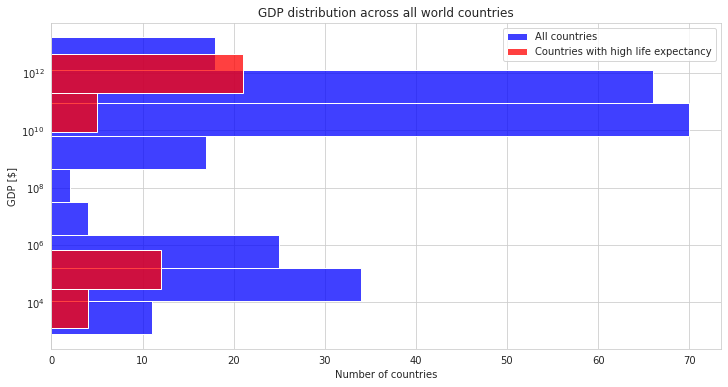

In [ ]:
# We create a database with only the countries with high life expectancy
df2015_highlife = df2015[df2015['Life expectancy']>=mean_value_life+std_life]

plt.figure(figsize=(12,6))

g = sns.histplot(
    data=df2015,
    y='GDP',
    color='Blue',
    log_scale=True)

g = sns.histplot(
    data=df2015_highlife,
    y='GDP',
    color='Red',
    log_scale=True)

plt.legend(['All countries', 'Countries with high life expectancy'])
g.set_box_aspect()
g.set_title("GDP distribution across all world countries")
g.set_xlabel("Number of countries")
g.set_ylabel("GDP [$]")

More precisely, the countries belonging to this criterion are the following:

In [ ]:
# Countries with high GDP and NOT high life expectancy

df_highGDP_regularlife=df2015.loc[(df2015['Life expectancy']<=mean_value_life+std_life) & (df2015['GDP']>=mean_value_GDP+std_GDP)]['Entity']

print('The number of countries fulfilling this criterion is: ', df_highGDP_regularlife.count())
print('The countries with high GDP and NOT high life expectancy are:')
df_highGDP_regularlife

The number of countries fulfilling this criterion is:  6
The countries with high GDP and NOT high life expectancy are:


7108            Brazil
10406            China
23360            India
23614        Indonesia
43748           Russia
57032    United States
Name: Entity, dtype: object

This is because the correlation we were discussing before was using GDP per capita, not GDP. Indeed, we can do the same analysis with GDP per capita.  

### g.

Text(0, 0.5, 'GDP per capita [$/capita]')

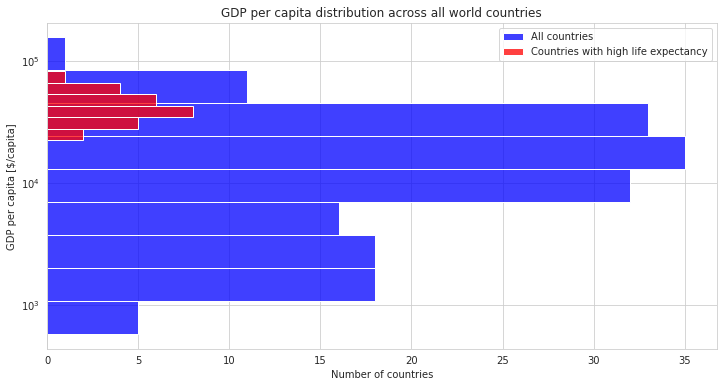

In [ ]:
# Same plot as before, but using GDP per capita instead

plt.figure(figsize=(12,6))

g = sns.histplot(
    data=df2015,
    y='GDP per capita',
    color='Blue',
    log_scale=True)

g = sns.histplot(
    data=df2015_highlife,
    y='GDP per capita',
    color='Red',
    log_scale=True)

plt.legend(['All countries', 'Countries with high life expectancy'])
g.set_title("GDP per capita distribution across all world countries")
g.set_xlabel("Number of countries")
g.set_ylabel("GDP per capita [$/capita]")

In [ ]:
# Mean and standard deviation of the GDP per capita
mean_value_GDP_capita= df2015['GDP per capita'].mean()
std_GDP_capita = df2015['GDP per capita'].std()

# Countries with high GDP per capita and NOT high life expectancy
df_highGDP_regularlife_capita=df2015.loc[(df2015['Life expectancy']<=mean_value_life+std_life) & (df2015['GDP per capita']>=mean_value_GDP_capita+std_GDP_capita)]['Entity']

print('The number of countries fulfilling this criterion is: ', df_highGDP_regularlife_capita.count())
print('The countries with high GDP per capita and NOT high life expectancy are:')
df_highGDP_regularlife_capita

The number of countries fulfilling this criterion is:  9
The countries with high GDP per capita and NOT high life expectancy are:


4112                  Bahrain
13619                 Denmark
27236                  Kuwait
39377                    Oman
43104                   Qatar
46042            Saudi Arabia
52182                  Taiwan
55928    United Arab Emirates
57032           United States
Name: Entity, dtype: object

As expected, it is now clear how only high GDP per capita countries have the possibility to also have high life expectancy. Nevertheless, we still see some countries that are rich but still lack high life expectancy. This is mainly in middle eastern countries, due to other factors we cannot see while only analyzing GDP per capita. 

## 2.

The purpose of this section is to use the knowledge acquired in the previous section to suggest other interesting data visualizations on meaningful questions.

### a.

Meaningful questions can be answered thanks to Data Science. Different interesting topics are dealt with in the following sections: *Life expectancy*, *Population growth*, *Annual CO2 emissions*, *Happiness*, *Homicides*, *Firearms rate* and *Corruption perception*.

The following questions are answered:
-  How CO2 emissions and population growth are linked? Can insights on future climate refugees can be shown?
- How GDP/GDP per capita is linked to CO2 emissions? Can some patterns be seen amongst the different continents?
- Do people tend to spend more money on Health the richer they get?
- Are homicides directly linked to firearms rate?
- How GDP per capita, satisfaction, homicides and corruption perception can be linked? Is there any correlation between these indicators?

Firstly, we need to import all the useful databases and clean them.

In [ ]:
# Creation of the database for life expectancy
# Source: https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure-per-capita
df2=pd.read_csv("datasets/life-expectancy-vs-health-expenditure-per-capita.csv")

# Cleaning of the dataframe
df2=df2[df2['Year']==2015]
df2 = df2.rename(columns={'Current health expenditure per capita, PPP (current international $)':'Health expenditure per capita'})

In [ ]:
# Creation and renaming of the database for population growth
# Source: https://ourworldindata.org/grapher/natural-population-growth
df3 = pd.read_csv("datasets/natural-population-growth.csv")

# Cleaning of the dataframe
df3 = df3.rename(columns={'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Rate of natural increase (per 1,000 population)':'Population growth'})
df3 = df3.rename(columns={'Medium fertility variant, 2020 - 2099: Annually interpolated demographic indicators - Rate of natural increase (per 1,000 population)':'Fertility'})

In [ ]:
# Creation of the database for annual CO2 emissions
# Source: https://ourworldindata.org/grapher/annual-co2-emissions-per-country
df4 = pd.read_csv("datasets/annual-co2-emissions-per-country.csv")

In [ ]:
# Creation of the database for happiness
# Source: https://ourworldindata.org/grapher/happiness-wvs-vs-gallup
df5 = pd.read_csv("datasets/happiness-cantril-ladder.csv")

# Cleaning of the dataframe
df5 = df5.rename(columns={'Life satisfaction in Cantril Ladder (World Happiness Report 2021)':'Satisfaction'})

In [ ]:
# Creation of the database for homicides
# Source: https://ourworldindata.org/grapher/intentional-homicides-per-100000-people
df6 = pd.read_csv("datasets/intentional-homicides-per-100000-people.csv")

# Cleaning of the dataframe
df6 = df6.rename(columns={'Intentional homicides (per 100,000 people)':'Homicides'})

In [ ]:
# Creation of the database for firearms rate
# Source: https://worldpopulationreview.com/country-rankings/gun-ownership-by-country
df7 = pd.read_csv("datasets/gun-ownership.csv")

# Cleaning of the dataframe
df7 = df7.rename(columns={'firearmsRate':'Firearms rate'})
df7 = df7.rename(columns={'country':'Entity'}) # Rename so to merge it with main dataframe
df7 = df7.sort_values('Entity') # Sorting to match main dataframe

In [ ]:
# Creation of the database for corruption perception
# Source: https://ourworldindata.org/grapher/average-rating-of-corruption-perception
df8 = pd.read_csv("datasets/average-rating-of-corruption-perception.csv")

# Cleaning of the dataframe
df8['Year'] = 2015

In [ ]:
# Merging of the different databases based on SQL method
# Only data from 2015 were kept since they are the most consistent.
# Inner join is used.
df_merged = df2.merge(df3)
df_merged = df_merged.merge(df4)
df_merged = df_merged.merge(df5)
df_merged = df_merged.merge(df6)
df_merged = df_merged.merge(df7)
df_merged = df_merged.merge(df8)
df_merged = df_merged.merge(df2015)

# Cleaning of the dataframe, removing useless columns
df_merged = df_merged.drop(['Total population (Gapminder, HYDE & UN)'],axis=1) # We already have the same data under 'Population'
df_merged = df_merged.drop(['Fertility'],axis=1)

### Data&nbsp;processing&nbsp;

In [ ]:
# Some Data per capita are provided but not for the whole countries: some processing has been done
df_merged['Annual CO2 emissions per capita']=df_merged['Annual CO2 emissions']/df_merged['Population']

### b.

The database has been cleaned and processed so the different data visualisations can be done. 
Plots concerning *GDP, Life expectancy, Population growth, Annual CO2 emissions, Happiness, Homicides, Political regime, Firearms rate and Corruption perception* will be shown below.

### b.1

Different **regressions** have been plotted to see quick and different types of correlation.
Plot of *GDP per capita* vs *Health expenditure*, *Firearms* vs Homicides*, and *GDP per capita* vs *Population growth* are shown to present different forms of correlations.

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='GDP per capita (log)', ylabel='Population growth'>

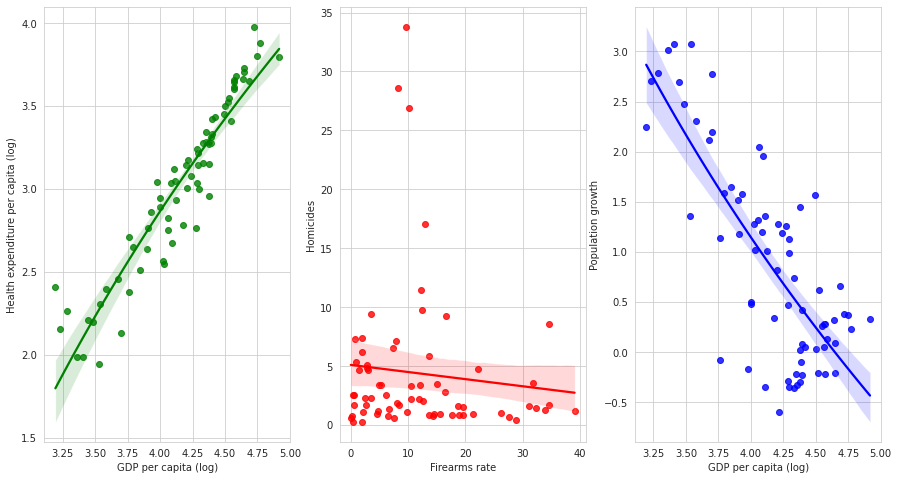

In [ ]:
# Creating a temporary dataframe to work with
df_merged_drop = df_merged

# Take the log of some data as it allows for better readibility of the plots
df_merged_drop["GDP per capita (log)"] = np.log10(df_merged_drop["GDP per capita"])
df_merged_drop["Health expenditure per capita (log)"] = np.log10(df_merged_drop["Health expenditure per capita"])
df_merged_drop["Homicides (log)"] = np.log10(df_merged_drop["Homicides"])
df_merged_drop["Firearms rate (log)"] = np.log10(df_merged_drop["Firearms rate"])

# Homicides data has some big outliers: El Salvador, Honduras, Venezuela have
# incredible high rates of homicides while having reasonably low firearms rate
# while United States have incredibly high firearms rate (very far on the right)
df_merged_drop_temp = df_merged_drop.dropna()
df_merged_drop_temp = df_merged_drop_temp[df_merged_drop_temp['Entity']!='United States']
df_merged_drop_temp = df_merged_drop_temp[df_merged_drop_temp['Homicides']<=45]

# Creating figure with multiple axes objects  
fig, axes = plt.subplots(1,3,figsize=(15,8))

# Plotting GDP per capita vs health expenditure per capita
sns.regplot(
    ax=axes[0],
    data=df_merged_drop,
    x="GDP per capita (log)",
    y="Health expenditure per capita (log)",
    logx=True,
    color='g')

# Plotting firearms rate vs homicides
sns.regplot(
    ax=axes[1],
    data=df_merged_drop_temp,
    x="Firearms rate",
    y="Homicides",
    color='r')

# Plotting GDP per capita vs population growth
sns.regplot(
    data=df_merged_drop,
    x="GDP per capita (log)",
    y="Population growth",
    logx=True,
    color='b')

In the first chart (green), a **positive correlation** is noticed. Richer countries have the possibility to spend more resources on health, such that the *"health is wealth"* motto seems to be proved here.

On the other hand, homicides (red) have a **weak correlation** with fire arms rate, contrary to what most people think. Homicides are broader and more complex than just firearms rate, meaning that to estabilsh a correlation we would need several other parameters.

The last chart (blue) clearly shows a **negative correlation**. This is because not-growing countries tend to be the one that are developed.  

These correlations allow us further down the notebook to skip checking correlations between everything as we know that (for example) health expenditure per capita is directly correlated to GDP per capita. 

### b.2

A **matrix plot** of *GDP per capita*, *Satisfaction*, *Homicides*, and *Corruption perception* is plotted to understand if some correlations or not between these different fields might exist or not.

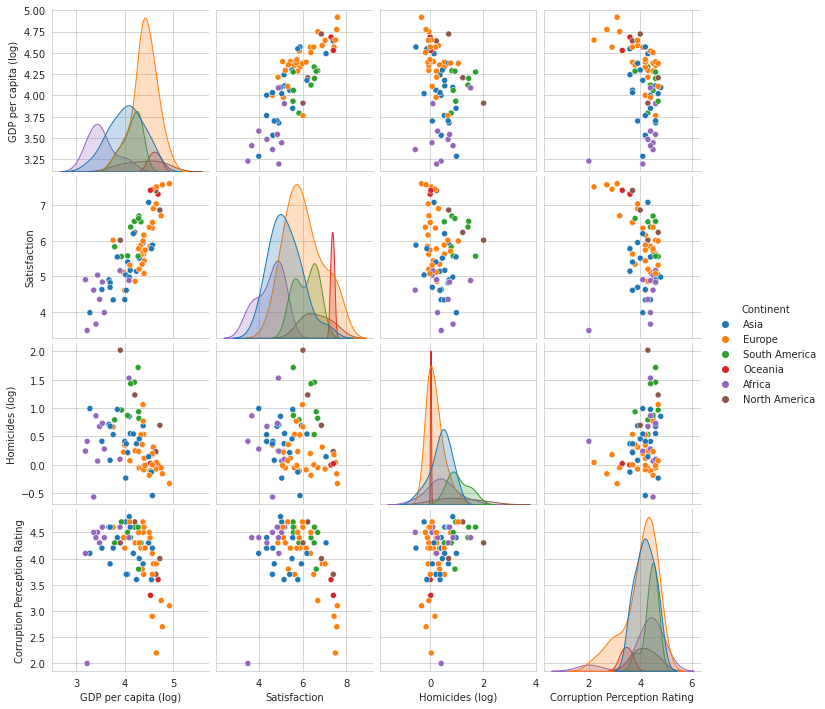

In [ ]:
# Deciding which variables to plot on both x and y axis
x_vars=["GDP per capita (log)", "Satisfaction", "Homicides (log)", "Corruption Perception Rating"]
y_vars=["GDP per capita (log)", "Satisfaction", "Homicides (log)", "Corruption Perception Rating"]

# Plotting the matrix plot
sns.pairplot(
    df_merged_drop, 
    hue="Continent",
    x_vars=x_vars,
    y_vars=y_vars)

This matrix plot allows us to get some information at a glimpse:
- *Satisfaction* is quite positevely correlated with *GDP per capita*. This seems to prove the motto *'Money make you happy'*. It has to be noted though that the correlation is logarithmic.
- All the other charts at first glance seem to not have any strong correlation.
If we look carefully, we can see some kind of pattern in *GDP per capita* vs *Corruption perception rating*, as very rich countries tend to have lower corruption. It has to be said that this may be enlarged by the log-log scale.
What strikes the most is how satisfaction is completely *unrelated* to the homicides.

### b.3

The last data we are analysing is regarding the *Annual CO2 emissions*. Two scatter plots are reported below as they allow for an interesting analysis of the difference between absolute values and per capita values.

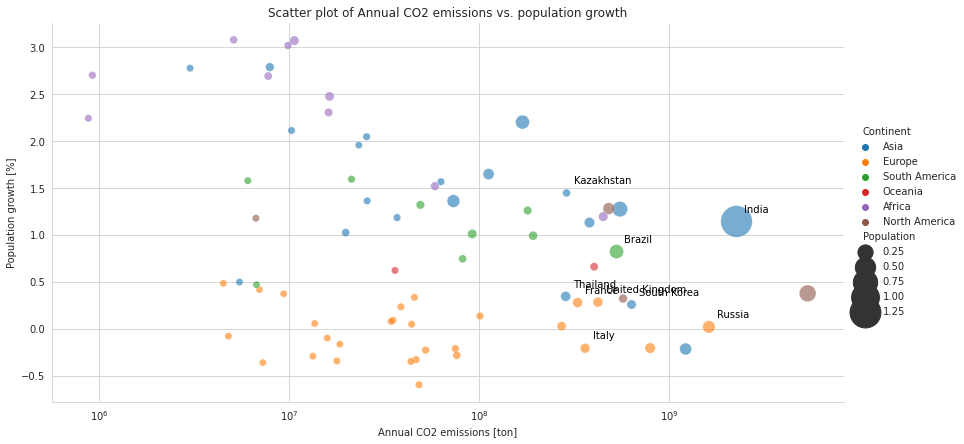

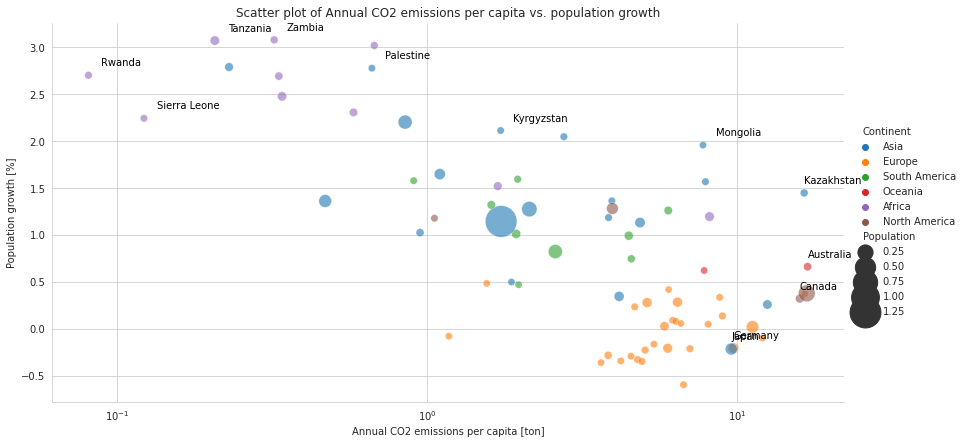

In [ ]:
# Two plots will be produced as output, allowing for them to be easily compared

#1st scatter plot 
g = sns.relplot(
    data=df_merged, 
    x='Annual CO2 emissions', 
    y='Population growth', 
    hue='Continent', 
    size='Population', 
    alpha=0.6, 
    edgecolors="grey", 
    linewidth=0.5, 
    sizes=(50, 1000), 
    height=6, 
    aspect=2).set(
        xscale="log", 
        title="Scatter plot of Annual CO2 emissions vs. population growth")

# Set x and y labels
g.set_xlabels("Annual CO2 emissions [ton]")
g.set_ylabels("Population growth [%]")

# The names of the countries with Annual CO2 emissions higher than the mean (x > mean_x) are reported on the plot
# It was decided to only put one label out of two for readibility, so the following boolean variable was used.
data_cleaner=True 
for x, y,name in zip(df_merged['Annual CO2 emissions'], df_merged['Population growth'],df_merged['Entity']):
 mean_x = df_merged['Annual CO2 emissions'].mean() #df_merged['Annual CO2 emissions per capita'].mean()
 if x > mean_x:
     data_cleaner=not(data_cleaner)
     if data_cleaner:
         plt.text(x = x*1.1, # x-coordinate position of data label
         y = y+0.1, # y-coordinate position of data label
         s = name, 
         color = 'black') # set colour of line

#2nd scatter plot
g = sns.relplot(
    data=df_merged, 
    x='Annual CO2 emissions per capita', 
    y='Population growth', 
    hue='Continent', 
    size='Population', 
    alpha=0.6, 
    edgecolors="grey", 
    linewidth=0.5, 
    sizes=(50, 1000), 
    height=6, 
    aspect=2).set(
        xscale="log", 
        title="Scatter plot of Annual CO2 emissions per capita vs. population growth")

# Set x and y labels
g.set_xlabels("Annual CO2 emissions per capita [ton]")
g.set_ylabels("Population growth [%]")

# The names of the countries with Annual CO2 emissions higher than the mean+standard deviation (x > mean_x+std_x) 
# and with Population growth higher than the mean+standard deviation (y > mean_y+std_y) are reported on the plot
# It was decided to only put one label out of two for readibility, so the following boolean variable was used.
data_cleaner=True 
mean_x = df_merged['Annual CO2 emissions per capita'].mean() 
std_x = df_merged['Annual CO2 emissions per capita'].std()
mean_y = df_merged['Population growth'].mean() 
std_y = df_merged['Population growth'].std()

for x, y,name in zip(df_merged['Annual CO2 emissions per capita'], df_merged['Population growth'],df_merged['Entity']):
 
 if x > mean_x+std_x:
     data_cleaner=not(data_cleaner)
     if data_cleaner:
         plt.text(x = x, # x-coordinate position of data label
         y = y+0.1, # y-coordinate position of data label, adjusted to be 150 below the data point
         s = name, # data label, formatted to ignore decimals
         color = 'black') # set colour of line


 if y > mean_y+std_y:
     data_cleaner=not(data_cleaner)
     if data_cleaner:
         plt.text(x = x*1.1, # x-coordinate position of data label
         y = y+0.1, # y-coordinate position of data label
         s = name, # data label
         color = 'black') # set colour of line

Regarding the scatter plot on *Population growth* and *Annual CO2 emissions* most of the African countries has a low annual CO2 emissions while they keep the highest population growth. On the other hand, the other continents have a large range of different annual CO2 emissions. For Europe, a rather low population growth is shown. This correlates with the idea of climate refugees, where the most impactful consequences of climate change occurs where the population growth is the highest but on populations that do not pollute that much.

Instead, looking at the same scatter plot but using the *per capita* data, we can clearly see a pattern that before was a rather weak correlation. More precisely, the previous extremes shown are even more truthful here since European, Oceanian and Northern American countries have far more CO2 emissions per capita while having low population growth. On the contraty, African countries have high growth and low emissions. Asia is still all over the span since they have a high diversity of countries as stated before.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9e887fa-88c4-4c31-b1da-c22fc6170e3c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>